# 📊 NZ Bank – Exploratory Data Analysis (EDA)

In this notebook, we explore customer data from a fictional NZ bank to understand:
- Demographic and financial trends
- Churn patterns across age, gender, region
- Correlations between features

This step will help guide future machine learning models and dashboards.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set theme for all plots
sns.set(style='whitegrid', palette='Set2')


In [2]:
# Upload file if using Google Colab
from google.colab import files
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(uploaded['cleaned_nz_banking_data.csv']))
df.head()


Saving cleaned_nz_banking_data.csv to cleaned_nz_banking_data.csv


,CustomerID,Age,Gender,Region,Tenure,AccountBalance,IsActive,NumOfProducts,CreditScore,Churn
0,1001,56,Male,Dunedin,9,2283.10,1,1,560,1
1,1002,69,Female,Palmerston North,9,6251.18,1,4,714,0
2,1003,46,Male,Napier-Hastings,7,3454.05,0,3,425,0
3,1004,32,Female,Napier-Hastings,0,2444.92,1,2,497,0
4,1005,60,Male,Wellington,4,5457.37,1,3,670,0


In [3]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      1000 non-null   int64  
 1   Age             1000 non-null   int64  
 2   Gender          1000 non-null   object 
 3   Region          1000 non-null   object 
 4   Tenure          1000 non-null   int64  
 5   AccountBalance  1000 non-null   float64
 6   IsActive        1000 non-null   int64  
 7   NumOfProducts   1000 non-null   int64  
 8   CreditScore     1000 non-null   int64  
 9   Churn           1000 non-null   int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 78.3+ KB


,CustomerID,Age,Tenure,AccountBalance,IsActive,NumOfProducts,CreditScore,Churn
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,1500.500000,46.247000,4.860000,3944.466060,0.69300,2.480000,591.804000,0.19300
std,288.819436,16.288072,3.120278,1911.269864,0.46148,1.133528,147.584609,0.39485
min,1001.000000,18.000000,0.000000,0.000000,0.00000,1.000000,350.000000,0.00000
25%,1250.750000,33.000000,2.000000,2594.077500,0.00000,1.000000,458.000000,0.00000
50%,1500.500000,46.000000,5.000000,3945.840000,1.00000,2.000000,585.500000,0.00000
75%,1750.250000,60.250000,8.000000,5293.542500,1.00000,4.000000,722.000000,0.00000
max,2000.000000,74.000000,10.000000,10123.890000,1.00000,4.000000,848.000000,1.00000


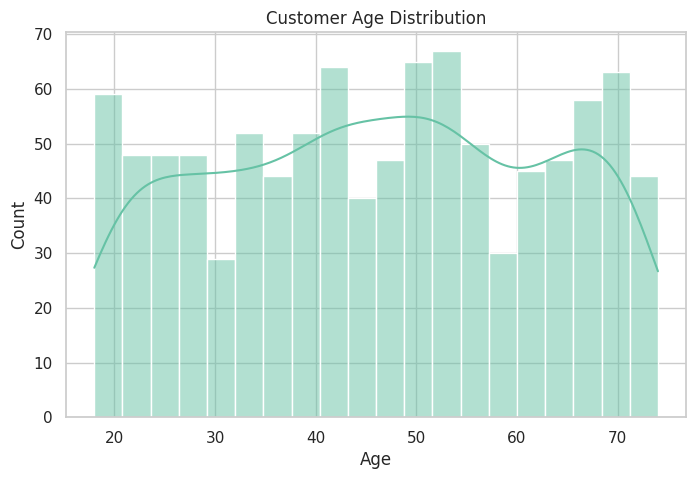

In [4]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


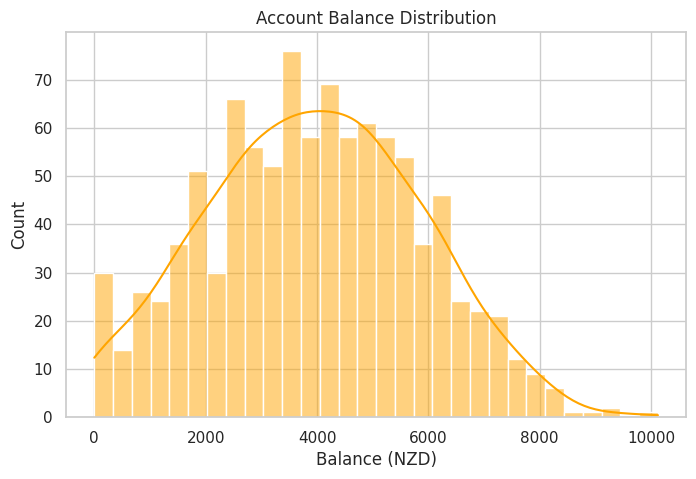

In [5]:
plt.figure(figsize=(8, 5))
sns.histplot(df['AccountBalance'], bins=30, kde=True, color='orange')
plt.title('Account Balance Distribution')
plt.xlabel('Balance (NZD)')
plt.ylabel('Count')
plt.show()


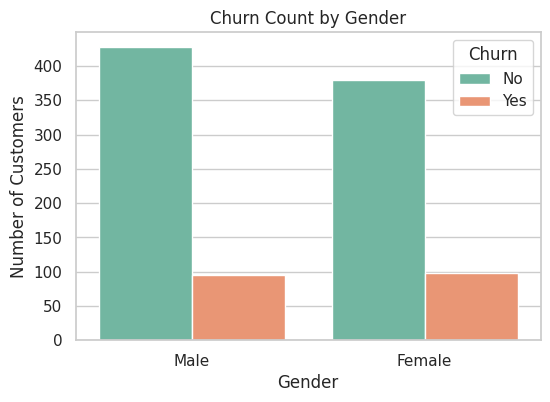

In [6]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender', hue='Churn')
plt.title('Churn Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()


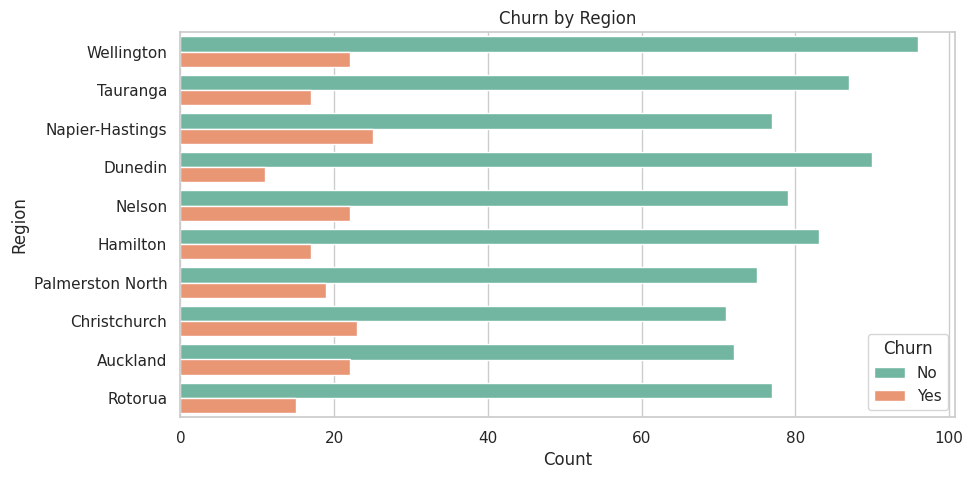

In [7]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='Region', hue='Churn', order=df['Region'].value_counts().index)
plt.title('Churn by Region')
plt.xlabel('Count')
plt.ylabel('Region')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()


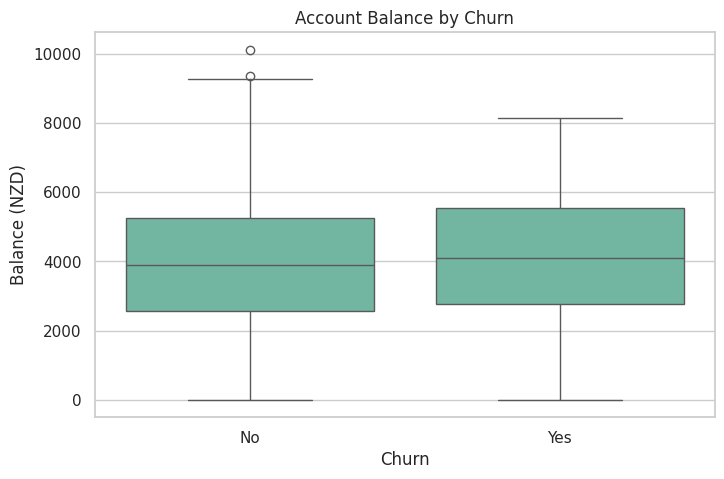

In [8]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Churn', y='AccountBalance')
plt.title('Account Balance by Churn')
plt.xlabel('Churn')
plt.ylabel('Balance (NZD)')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


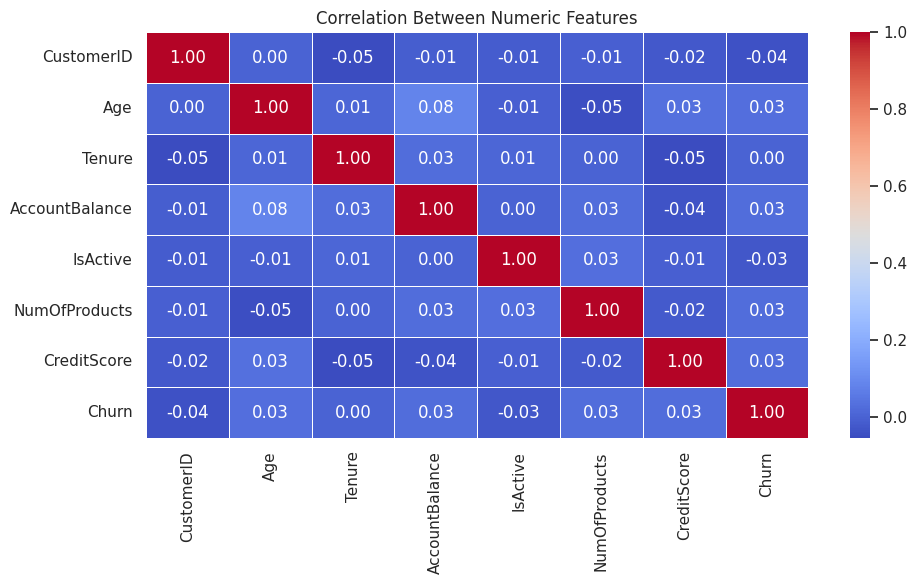

In [11]:
# Only use numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

import os
# Create the directory if it doesn't exist
os.makedirs('output/eda_charts', exist_ok=True)

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between Numeric Features')
plt.tight_layout()
plt.savefig('output/eda_charts/correlation_heatmap.png')
plt.show()

# ✅ Summary

From our EDA, we observed:
- Most customers are aged between 30–60
- Higher churn among some regions and gender groups
- Correlation exists between credit score and churn, but not extremely strong
- Account balance distributions vary widely

These insights will help us create more accurate churn prediction models next.